In [1]:
from tensorflow.python.keras.datasets import mnist

In [2]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [5]:
import cv2
import numpy as np

In [6]:
#This function is used to dispay 6 random images from MNIST dataset in another window
for i in range(0,6):
    random_num=np.random.randint(0,len(x_train))
    img=x_train[random_num]
    window_name='Random Sample '+str(i)
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
cv2.destroyAllWindows()

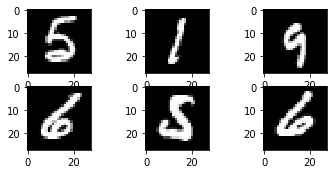

In [7]:
#We will do same thing using matplotlib to plot 6 image
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(331)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.show()

# Data Preparation

In [8]:
#storing the number of rows and columns

img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]

#since data is in 3D we have to convert into 4D to fit in keras module
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

#storing the shape of  a single image
input_image=(img_rows,img_cols,1)

#keras take imagw type  of float32 data type. SO wwe need to convert it.
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

#Now we will perform data  normalisation
x_train/=255
x_test/=255

print('x_train shape: ',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
from keras.utils import np_utils

Using TensorFlow backend.


# One hot encoding

In [10]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

print("Number of classes: " +str(y_test.shape[1]))

num_classes=y_test.shape[1]
num_pixels=x_train.shape[1]*x_train.shape[2]

Number of classes: 10


In [11]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Model creation 

Steps to follow:
1. We will construct a simple but effective CNN that uses 32 filters of size 3*3
2. We have added a 2nd convolution layer of 64 filters of the same size 3*2
3. We then downsample our data to 2*2, here we apply a dropout where p=0.25
4. We then flatten our max pool output that is connected to a Dense layer/ Fully connected layer that has an output size of 128
5. Now we apply dropout with p=0.5
6. Thus 128 output is connected to another fully connected layer/dense layer that outputs to the 10 categorical units

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

In [13]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                input_shape=input_image))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [14]:
batch_size=32
epochs=1
history=model.fit(x_train,
                 y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_test,y_test))

score=model.evaluate(x_test,y_test,verbose=0)
print('test loss: ',score[0])
print('test accuracy',score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 133s 2ms/step - loss: 0.5913 - accuracy: 0.8127 - val_loss: 0.2066 - val_accuracy: 0.9407
test loss:  0.20657157068997622
test accuracy 0.9406999945640564


In [15]:
batch_size=32
epochs=12
history=model.fit(x_train,
                 y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_test,y_test))

score=model.evaluate(x_test,y_test,verbose=0)
print('test loss: ',score[0])
print('test accuracy',score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 144s 2ms/step - loss: 0.2951 - accuracy: 0.9101 - val_loss: 0.1414 - val_accuracy: 0.9578
Epoch 2/12
60000/60000 [==============================] - 140s 2ms/step - loss: 0.2216 - accuracy: 0.9339 - val_loss: 0.1062 - val_accuracy: 0.9672
Epoch 3/12
60000/60000 [==============================] - 130s 2ms/step - loss: 0.1743 - accuracy: 0.9475 - val_loss: 0.0817 - val_accuracy: 0.9754
Epoch 4/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.1446 - accuracy: 0.9574 - val_loss: 0.0689 - val_accuracy: 0.9790
Epoch 5/12
60000/60000 [==============================] - 112s 2ms/step - loss: 0.1230 - accuracy: 0.9635 - val_loss: 0.0607 - val_accuracy: 0.9817
Epoch 6/12
60000/60000 [==============================] - 115s 2ms/step - loss: 0.1103 - accuracy: 0.9675 - val_loss: 0.0584 - val_accuracy: 0.9818
Epoch 7/12
60000/60000 [==============================] - 116s

# Plotting loss and accuracy chart

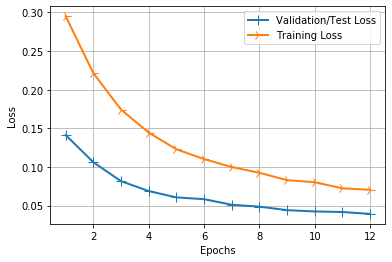

In [16]:
#plot loss chart

history_dict=history.history

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,loss_values,label='Training Loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

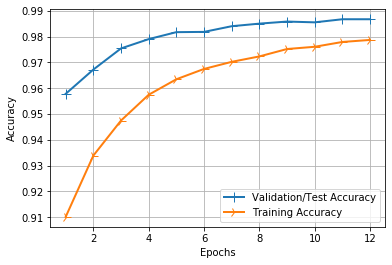

In [17]:
#plot accuracy chart

history_dict=history.history

acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_acc_values,label='Validation/Test Accuracy')
line2=plt.plot(epochs,acc_values,label='Training Accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Save the model

In [18]:
model.save("C:/Users/vinay/Desktop/Computer Vision Practice/mnist_with_10_epoch.h1")
print("Model saved")

Model saved


In [19]:
from keras.models import load_model

In [20]:
classifier=load_model("C:/Users/vinay/Desktop/Computer Vision Practice/mnist_with_10_epoch.h1")

# Input some of our test data into our classifier

In [21]:
def draw_test(name,pred,input_im):
    BLACK=[0,0,0]
    expanded_image=cv2.copyMakeBorder(input_im,0,0,0,imageL.shape[0],cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image=cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image,str(pred),(152,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,255,0),2)
    cv2.imshow(name,expanded_image)

for i in range(1,10):
    rand=np.random.randint(0,len(x_test))
    input_im=x_test[rand]
    
    imageL=cv2.resize(input_im,None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
    input_im=input_im.reshape(1,28,28,1)
    
    res=str(classifier.predict_classes(input_im,1,verbose=0)[0])
    draw_test("Prediction ", res, imageL)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [29]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [33]:
import pydot

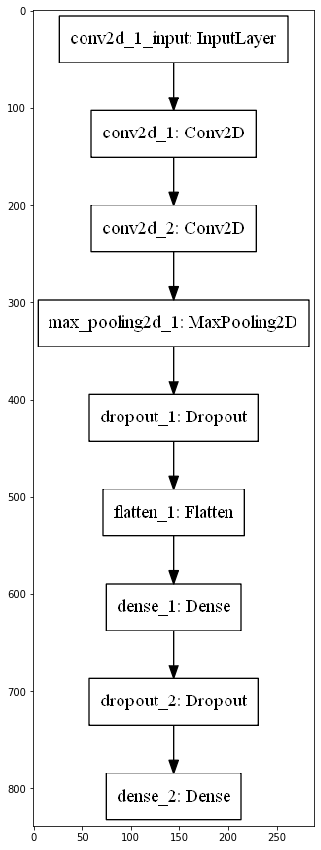

In [37]:
import matplotlib.image as mpimg
img=mpimg.imread(model_diagrams_path+'model.png')
plt.figure(figsize=(30,15))
imgplot=plt.imshow(img)